- smaller radius, more blurred
- https://www.tutorialspoint.com/dip/high_pass_vs_low_pass_filters.htm
- http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html

In [2]:
import os, subprocess, glob

import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage, fftpack, misc

import matplotlib.cm as cm
%matplotlib inline

/share/instsww/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:279: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [3]:
# not using this class for anything but it's a reference for refining the 3D image.

class Img2D:
    
    def __init__(self, n, r, k):
        self.n = n
        self.r = r
        self.k = k
        self.arr, self.centers = self.gen_2d_points(n, r, k)

    def gen_2d_points(self, n, r, k):
        """
        n = dim of the image.
        r = max radius of point.
        k = num of random points.
        all params >= 1.
        """
        arr = np.ones((n, n))
        centers = []
        while k > 0:
            a = np.random.randint(0, n)
            b = np.random.randint(0, n)
            centers += [(a, b)]
            r1 = np.random.randint(r//2 + 1, r)
            # (a, b) is center of point, r1 is radius for point. 

            y, x = np.ogrid[-a:n-a, -b:n-b]
            mask = x*x + y*y <= r1*r1
            arr[mask] = 255
            k -= 1
        return arr, centers
    
    def get_img(self):
        # not filtered array
        return self.arr
    
    def show_img(self):
        img_filtered = ndimage.fourier.fourier_gaussian(self.arr, sigma=2)
        plt.imshow(img_filtered, cmap='gray', interpolation='nearest');
        
    def get_centers(self):
        return self.centers
    
    def plt_x_section(self):
        img_filtered = ndimage.filters.gaussian_filter(self.arr, sigma=2, order=0)
        x, y = self.centers[0]
        start = -1
        end = -1
        prev = -1
        prev = 100
        for i in range(0, 500):
            curr = img_filtered[x][i]
            if start == -1 and prev == 1.0 and curr != 1.0:
                start = i
            elif start != -1 and end == -1 and prev != 1.0 and curr == 1.0:
                end = i
                break
            prev = curr
        plt.plot(img_filtered[x][start:end])
        plt.show()

In [7]:
img_2d = Img2D(100, 8, 1)


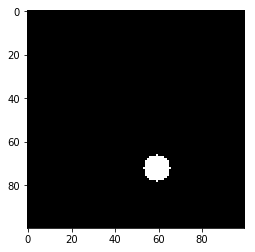

In [8]:
plt.imshow(img_2d.arr, cmap='gray', interpolation='nearest');


In [33]:
n = 200
a, b = n//2, n//2
arr = np.zeros((n, n))
y, x = np.ogrid[-a:n-a, -b:n-b]
mask = x*x + y*y <= 15**2
arr[mask] = 255
img = arr

#plt.imshow(arr, cmap='gray', interpolation='nearest');

In [39]:
#img = misc.ascent()

def low_pass_filter(img, w):
    """
    Returns a new image that is low pass filtered.
    """
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    # plt.imshow(magnitude_spectrum, cmap = 'gray')
    rows, cols = img.shape
    crow, ccol = rows//2 , cols//2
    
    
    y, x = np.ogrid[-100:100, -100:100]
    mask = x*x + y*y >= w**2
    fshift[mask] = 0
    """
    fshift[0:crow-w] = False
    fshift[crow+w:] = False
    fshift[:, 0:ccol-w] = False
    fshift[:, ccol+w:] = False
    """
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return img_back
    


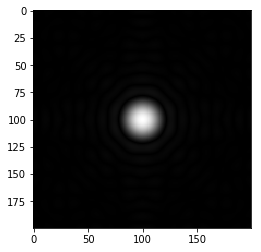

In [42]:
rv = low_pass_filter(img, 10)
plt.imshow(rv, cmap='gray', interpolation='nearest')

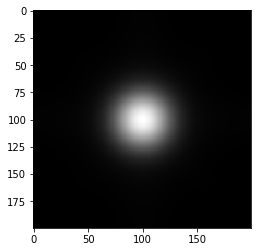

In [43]:
rv = ndimage.gaussian_filter(low_pass_filter(img, 10), sigma=15)
plt.imshow(rv, cmap='gray', interpolation='nearest')

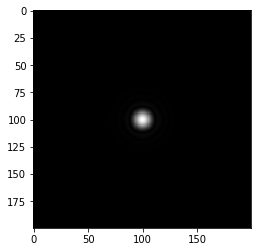

In [8]:
rv = low_pass_filter(img, 16)
plt.imshow(rv, cmap='gray', interpolation='nearest')

In [9]:
rows, cols = img.shape
crow, ccol = rows//2 , cols//2
r = 8
fshift[0:crow-r] = 0
fshift[crow+r:] = 0
fshift[:, 0:ccol-r] = 0
fshift[:, ccol+r:] = 0

f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)
plt.imshow(img_back, cmap='gray', interpolation='nearest')

NameError: name 'fshift' is not defined

In [1]:
a, b = 250, 250
arr = np.zeros((500, 500))
y, x = np.ogrid[-a:500-a, -b:500-b]
mask = x*x + y*y <= 15*15
arr[mask] = 255
img = arr

img = ndimage.gaussian_filter(img, sigma=20)
plt.imshow(img, cmap='gray', interpolation='nearest')

NameError: name 'np' is not defined

In [ ]:
# TODO: figure out a good radius for smaller points in 500x500x500 image

In [ ]:
class Img3D:
    
    def __init__(self, n, r, k):
        self.n = n
        self.r = r
        self.k = k
        self.img_unfiltered, self.centers = self.gen_3d_points()
        # Might need to change sigma based on n.
        self.img_filtered = ndimage.gaussian_filter(self.img_unfiltered, sigma=7, order=0)
        
    def gen_3d_points(self):
        """
        n = dim of the image.
        r = max radius of point.
        k = num of random points.
        all params >= 1.
        """
        arr = np.zeros((self.n, self.n, self.n))
        centers = []
        for _ in range(self.k):
            a = np.random.randint(self.n//4, 3*self.n//4)
            b = np.random.randint(self.n//4, 3*self.n//4)
            c = np.random.randint(self.n//4, 3*self.n//4)
            # c = self.n//2
            centers += [(a, b, c)]
            r1 = np.random.randint(self.r//2, self.r)
            z, y, x = np.ogrid[-a:self.n-a, -b:self.n-b, -c:self.n-c]
            mask = x*x + y*y + z*z <= r1*r1
            arr[mask] = 255
        return arr, centers

    def show_img(self, filter_flag):
        if filter_flag == 0:
            plt.imshow(self.img_unfiltered[self.centers[0][0]], cmap='gray', interpolation='nearest');
        elif filter_flag == 1:
            plt.imshow(self.img_filtered[:,self.centers[0][0],:,:], cmap='gray', interpolation='nearest');

In [ ]:
img = Img3D(100, 20, 1)
# (a, b, c)
# a -> z axis
# b ->

In [ ]:
plt.imshow(img.img_filtered[img.centers[0][0],:,:], cmap='gray', interpolation='nearest');

In [ ]:
plt.imshow(img.img_filtered[:,img.centers[0][1],:], cmap='gray', interpolation='nearest');

In [ ]:
plt.imshow(img.img_filtered[:,:,img.centers[0][2]], cmap='gray', interpolation='nearest');

In [ ]:
self.img_filtered[self.centers[0][0],:,:] # xy plane

self.img_filtered[:,self.centers[0][1],:,:] # xz plane

self.img_filtered[:,:,self.centers[0][2]] # yz plane

In [ ]:
import numpy as np
from scipy import signal

# first build the smoothing kernel
sigma = 1.0     # width of kernel
print("making axes...")
x = np.arange(-50,51,1)   # coordinate arrays -- make sure they contain 0!
y = np.arange(-50,51,1)
z = np.arange(-50,51,1)

print("making meshgrid...")
xx, yy, zz = np.meshgrid(x,y,z)

print("making kernel...")
kernel = np.exp(-(xx**2 + yy**2 + zz**2)/(2*sigma**2))

# apply to sample data
data = np.zeros((100, 100, 100))
data[50, 50, 50] = 1.

print("convolving...")
filtered = signal.convolve(data, kernel, mode="same")

# check output
# print(filtered[5,:,:])

In [ ]:
plt.imshow(filtered[50,:,:], cmap='gray', interpolation='nearest');